## 필요한 라이브러리 불러오기

In [1]:
# pandas, numpy, seaborn을 불러옵니다.

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 구버전의 주피터 노트북에서 그래프가 보이는 설정
%matplotlib inline

## 시각화를 위한 한글 폰트 설정하기

In [2]:
# 폰트 설정이 잘 안 된다면 해당 셀의 마지막 줄 주석을 풀고 실행해 보세요.
# colab 사용시에도 아래 함수를 활용해 보세요.
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

# plt.rc("font", family=get_font_family())

In [3]:
plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)

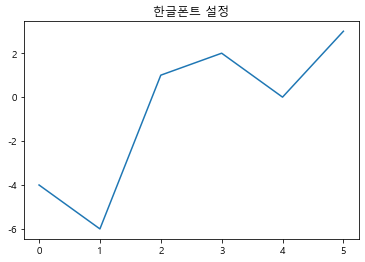

In [4]:
# 한글폰트와 마이너스 폰트 설정 확인
plt.title("한글폰트 설정")
plt.plot([-4, -6, 1, 2, 0, 3])

## 데이터 불러오기
* 공공데이터 포털 : https://www.data.go.kr/dataset/15012005/fileData.do
* 공공데이터 포털에서 소상공인시장진흥공단 상가업소정보를 다운로드 받아 사용했습니다
* 영상에 사용한 데이터셋 : http://bit.ly/open-data-set-folder (공공데이터포털에서 다운로드 받은 파일이 있습니다. 어떤 파일을 다운로드 받아야 될지 모르겠다면 여기에 있는 파일을 사용해 주세요.)

In [5]:
# 파일을 불러와 df 라는 변수에 담습니다.
df =pd.read_csv("C:/Users/diqqo/inflearn_study/data/상가업소정보_201912_01.csv", sep='|')

In [6]:
df.shape

(573680, 39)

### info 보기

In [7]:
# info 를 사용하면 데이터의 전체적인 정보를 볼 수 있습니다.
# 데이터의 사이즈, 타입, 메모리 사용량 등을 볼 수 있습니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     573680 non-null  int64  
 1   상호명        573679 non-null  object 
 2   지점명        76674 non-null   object 
 3   상권업종대분류코드  573680 non-null  object 
 4   상권업종대분류명   573680 non-null  object 
 5   상권업종중분류코드  573680 non-null  object 
 6   상권업종중분류명   573680 non-null  object 
 7   상권업종소분류코드  573680 non-null  object 
 8   상권업종소분류명   573680 non-null  object 
 9   표준산업분류코드   539290 non-null  object 
 10  표준산업분류명    539290 non-null  object 
 11  시도코드       573680 non-null  int64  
 12  시도명        573680 non-null  object 
 13  시군구코드      573680 non-null  int64  
 14  시군구명       573680 non-null  object 
 15  행정동코드      573680 non-null  int64  
 16  행정동명       573680 non-null  object 
 17  법정동코드      573680 non-null  int64  
 18  법정동명       573680 non-null  object 
 19  지번코드       573680 non-n

### 결측치 보기

In [8]:
# isnull() 을 사용하면 데이터의 결측치를 볼 수 있습니다.
# 결측치는 True로 값이 있다면 False로 표시되는데 True 는 1과 같기 때문에 
# True 값을 sum()을 사용해서 더하게 되면 합계를 볼 수 있습니다.
# mean()을 사용하면 결측치의 비율을 볼 수 있습니다.
df.isnull().sum()

상가업소번호            0
상호명               1
지점명          497006
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      34390
표준산업분류명       34390
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         98756
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        501692
건물관리번호            0
건물명          308072
도로명주소             0
구우편번호             0
신우편번호             9
동정보          522824
층정보          226553
호정보          488414
경도                0
위도                0
dtype: int64

### 사용하지 않는 컬럼 제거하기

In [9]:
# drop을 하는 방법도 있지만 사용할 컬럼만 따로 모아서 보는 방법도 있습니다.
# 여기에서는 사용할 컬럼만 따로 모아서 사용합니다.
columns = ['상호명', '상권업종대분류명', '상권업종중분류명', '상권업종소분류명', 
           '시도명', '시군구명', '행정동명', '법정동명', '도로명주소', 
           '경도', '위도']
df = df[columns].copy()
df.head()

상호명 상권업종대분류명  상권업종중분류명     상권업종소분류명    시도명 시군구명  행정동명 법정동명  \
0         와라와라호프       음식      유흥주점        호프/맥주  서울특별시  강남구  대치1동  대치동   
1  커피빈코리아선릉로93길점       음식    커피점/카페  커피전문점/카페/다방  서울특별시  강남구  역삼1동  역삼동   
2           프로포즈       음식      유흥주점        호프/맥주  서울특별시  금천구  독산3동  독산동   
3       싱싱커피&토스트       음식     패스트푸드        토스트전문  부산광역시  사상구   괘법동  괘법동   
4       가락사우나내스낵    생활서비스  대중목욕탕/휴게   사우나/증기탕/온천  서울특별시  송파구   석촌동  석촌동   

                  도로명주소          경도         위도  
0  서울특별시 강남구 남부순환로 2933  127.061026  37.493922  
1    서울특별시 강남구 선릉로93길 6  127.047883  37.505675  
2    서울특별시 금천구 가산로 34-6  126.899220  37.471711  
3      부산광역시 사상구 괘감로 37  128.980455  35.159774  
4      서울특별시 송파구 가락로 71  127.104071  37.500249

In [10]:
df.shape

(573680, 11)

In [11]:
# 제거 후 메모리 사용량 보기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   상호명       573679 non-null  object 
 1   상권업종대분류명  573680 non-null  object 
 2   상권업종중분류명  573680 non-null  object 
 3   상권업종소분류명  573680 non-null  object 
 4   시도명       573680 non-null  object 
 5   시군구명      573680 non-null  object 
 6   행정동명      573680 non-null  object 
 7   법정동명      573680 non-null  object 
 8   도로명주소     573680 non-null  object 
 9   경도        573680 non-null  float64
 10  위도        573680 non-null  float64
dtypes: float64(2), object(9)
memory usage: 48.1+ MB


## 색인으로 서브셋 가져오기
### 서울만 따로 보기

In [12]:
# 시도명이 서울로 시작하는 데이터만 봅니다.
# 또, df_seoul 이라는 변수에 결과를 저장합니다.
# 새로운 변수에 데이터프레임을 할당할 때 copy()를 사용하는 것을 권장합니다.
df_seoul = df[df["시도명"] == "서울특별시"].copy()
df_seoul.head()

상호명 상권업종대분류명  상권업종중분류명     상권업종소분류명    시도명 시군구명  행정동명 법정동명  \
0         와라와라호프       음식      유흥주점        호프/맥주  서울특별시  강남구  대치1동  대치동   
1  커피빈코리아선릉로93길점       음식    커피점/카페  커피전문점/카페/다방  서울특별시  강남구  역삼1동  역삼동   
2           프로포즈       음식      유흥주점        호프/맥주  서울특별시  금천구  독산3동  독산동   
4       가락사우나내스낵    생활서비스  대중목욕탕/휴게   사우나/증기탕/온천  서울특별시  송파구   석촌동  석촌동   
5            초밥왕       음식    일식/수산물     음식점-초밥전문  서울특별시  송파구  잠실6동  신천동   

                   도로명주소          경도         위도  
0   서울특별시 강남구 남부순환로 2933  127.061026  37.493922  
1     서울특별시 강남구 선릉로93길 6  127.047883  37.505675  
2     서울특별시 금천구 가산로 34-6  126.899220  37.471711  
4       서울특별시 송파구 가락로 71  127.104071  37.500249  
5  서울특별시 송파구 올림픽로 293-19  127.102490  37.515149

In [13]:
# unique 를 사용하면 중복을 제거한 시군구명을 가져옵니다. 
# 그리고 shape로 갯수를 출력해 봅니다.
df_seoul["시군구명"].unique()

array(['강남구', '금천구', '송파구', '광진구', '강서구', '중구', '서초구', '성북구', '구로구',
       '영등포구', '서대문구', '동대문구', '노원구', '동작구', '성동구', '관악구', '강동구', '양천구',
       '종로구', '강북구', '은평구', '중랑구', '도봉구', '마포구', '용산구'], dtype=object)

In [14]:
# nunique 를 사용하면 중복을 제거한 시군구명의 갯수를 세어줍니다.
df_seoul["시군구명"].nunique()

25

## 파일로 저장하기
* 전처리한 파일을 저장해 두면 재사용을 할 수 있습니다.
* 재사용을 위해 파일로 저장합니다.

In [15]:
# "seoul_open_store.csv" 라는 이름으로 저장합니다.
df_seoul.to_csv("seoul_open_store.csv", index="False")

In [16]:
# 제대로 저장이 되었는지 같은 파일을 불러와서 확인합니다.
pd.read_csv("seoul_open_store.csv").head(2)

Unnamed: 0            상호명 상권업종대분류명 상권업종중분류명     상권업종소분류명    시도명 시군구명  행정동명  \
0           0         와라와라호프       음식     유흥주점        호프/맥주  서울특별시  강남구  대치1동   
1           1  커피빈코리아선릉로93길점       음식   커피점/카페  커피전문점/카페/다방  서울특별시  강남구  역삼1동   

  법정동명                 도로명주소          경도         위도  
0  대치동  서울특별시 강남구 남부순환로 2933  127.061026  37.493922  
1  역삼동    서울특별시 강남구 선릉로93길 6  127.047883  37.505675

## 배스킨라빈스, 던킨도너츠 위치 분석

### 특정 상호만 가져오기
* 여기에서는 배스킨라빈스와 던킨도너츠 상호를 가져와서 실습합니다.
* 위에서 pandas의 str.conatains를 활용해 봅니다.
* https://pandas.pydata.org/docs/user_guide/text.html#testing-for-strings-that-match-or-contain-a-pattern

* 상호명에서 브랜드명을 추출합니다.
* 대소문자가 섞여 있을 수도 있기 때문에 대소문자를 변환해 줍니다.
* 오타를 방지하기 위해 배스킨라빈스의 영문명은 baskinrobbins, 던킨도너츠는 dunkindonuts 입니다.

In [17]:
# 문자열의 소문자로 변경하는 메소드를 사용합니다.
# "상호명_소문자" 컬럼을 만듭니다.

df_seoul["상호명_소문자"] = df_seoul["상호명"].str.lower()

In [18]:
# baskinrobbins 를 "상호명_소문자" 컬럼으로 가져옵니다.
# 띄어쓰기 등의 다를 수 있기 때문에 앞글자 baskin 만 따서 가져오도록 합니다.
# '상호명_소문자'컬럼으로 '배스킨라빈스|baskin' 를 가져와 갯수를 세어봅니다.
# loc[행]
# loc[행, 열]
df_seoul.loc[df_seoul["상호명_소문자"].str.contains("베스킨라빈스|배스킨라빈스|baskinrobbins"),
             "상호명_소문자"].shape


(466,)

In [19]:
# 상호명에서 던킨도너츠만 가져옵니다.
# 상호명은 소문자로 변경해 준 컬럼을 사용합니다.
# 던킨|dunkin 의 "상호명_소문자"로 갯수를 세어봅니다.

df_seoul.loc[df_seoul["상호명_소문자"].str.contains("던킨|dunkin"), "상호명_소문자"].shape

(191,)

In [20]:
# '상호명_소문자'컬럼으로  '배스킨|베스'킨|baskin|던킨|dunkin'를 가져와 df_31 변수에 담습니다.
df_31 = df_seoul[df_seoul["상호명_소문자"].str.contains("배스킨라빈스|베스킨라빈스|baskinrobbins|던킨|dunkin")].copy()
df_31.shape

(657, 12)

In [21]:
# ~은 not을 의미합니다. 베스킨라빈스가 아닌 데이터를 찾을 때 사용하면 좋습니다.
# 아래 코드처럼 결측치를 던킨도너츠로 채워줘도 괜찮습니다.
df_31.loc[df_31["상호명_소문자"].str.contains("배스킨라빈스|베스킨라빈스|baskinrobbins"), 
          "브랜드명"] = "배스킨라빈스"
df_31[["상호명", "브랜드명"]].head()

상호명    브랜드명
76         배스킨라빈스  배스킨라빈스
1167        던킨도너츠     NaN
1819  던킨도너츠테크노마트점     NaN
2164       베스킨라빈스  배스킨라빈스
2305   던킨도너츠창동하나로     NaN

In [22]:
# 'df_31에 담긴 상호명','브랜드명'으로 미리보기를 합니다.
# df_31.loc[~df_31["상호명_소문자"].str.contains("배스킨라빈스|베스킨라빈스|baskinrobbins"), 
#           "브랜드명"]

df_31["브랜드명"] = df_31["브랜드명"].fillna("던킨도너츠")
df_31["브랜드명"]

76        배스킨라빈스
1167       던킨도너츠
1819       던킨도너츠
2164      배스킨라빈스
2305       던킨도너츠
           ...  
558894     던킨도너츠
560984     던킨도너츠
561929    배스킨라빈스
561930    배스킨라빈스
569825     던킨도너츠
Name: 브랜드명, Length: 657, dtype: object

In [23]:
# 데이터가 제대로 모아졌는지 확인합니다.
# "상권업종대분류명"을  value_counts 를 통해 빈도수를 계산합니다.

df_31["상권업종대분류명"].value_counts()

음식       655
소매         1
생활서비스      1
Name: 상권업종대분류명, dtype: int64

In [24]:
# "상권업종대분류명"컬럼에서 isin 기능을 사용해서 "소매", "생활서비스" 인 데이터만 가져옵니다.

df_31[df_31["상권업종대분류명"].isin(["소매", "생활서비스"])]

상호명 상권업종대분류명 상권업종중분류명 상권업종소분류명    시도명 시군구명  행정동명 법정동명  \
358699         배스킨라빈스       소매    종합소매점      할인점  서울특별시  강남구  압구정동  신사동   
556592  baskinrobbins    생활서비스    광고/인쇄     인쇄종합  서울특별시  강남구  역삼1동  역삼동   

                     도로명주소          경도         위도        상호명_소문자    브랜드명  
358699  서울특별시 강남구 압구정로 204  127.029381  37.527375         배스킨라빈스  배스킨라빈스  
556592  서울특별시 강남구 강남대로 396  127.028289  37.498154  baskinrobbins  배스킨라빈스

In [25]:
# "상권업종대분류명"에서 "소매", "생활서비스"는 제외합니다.
df_31 = df_31[~df_31["상권업종대분류명"].isin(["소매", "생활서비스"])].copy()
df_31.shape

(655, 13)

### 범주형 값으로 countplot 그리기

In [26]:
# value_counts 로 "브랜드명"의 빈도수를 구합니다.
brand_count = df_31["브랜드명"].value_counts()
brand_count

배스킨라빈스    464
던킨도너츠     191
Name: 브랜드명, dtype: int64

<AxesSubplot:>

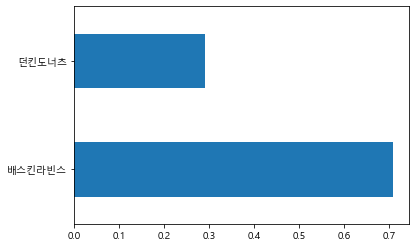

In [27]:
# normalize=True 로 빈도수의 비율을 구합니다.
df_31["브랜드명"].value_counts(normalize=True).plot.barh()

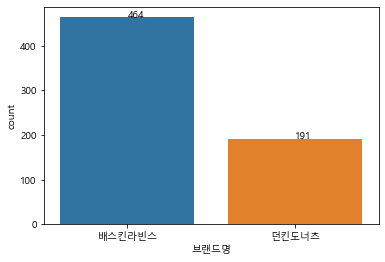

In [31]:
# countplot 을 그립니다.
g = sns.countplot(data=df_31, x="브랜드명")

for i, val in enumerate(brand_count.index):
    g.text(x=i, y=brand_count[i], s=brand_count[i])

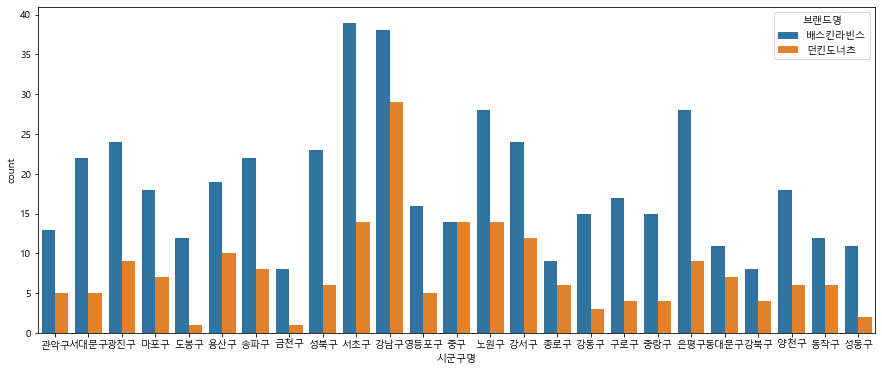

In [32]:
# 시군구명으로 빈도수를 세고 브랜드명으로 색상을 다르게 표현하는 countplot 을 그립니다.
plt.figure(figsize=(15,6))
g = sns.countplot(data=df_31, x="시군구명", hue="브랜드명")

### scatterplot 그리기

<AxesSubplot:xlabel='경도', ylabel='위도'>

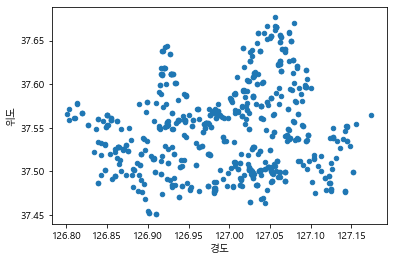

In [33]:
# Pandas 의 plot 으로 scatterplot 을 그립니다.
df_31[["위도", "경도"]].plot.scatter(x="경도", y="위도")

<AxesSubplot:xlabel='경도', ylabel='위도'>

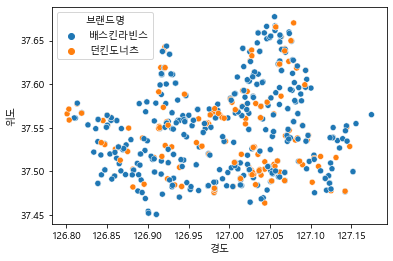

In [34]:
# seaborn의 scatterplot 으로 hue에 브랜드명을 지정해서 시각화 합니다.
sns.scatterplot(data=df_31, x="경도", y="위도", hue="브랜드명")

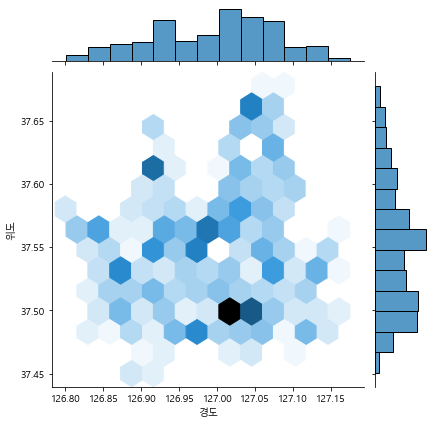

In [35]:
# 위에서 그렸던 그래프를 jointplot 으로 kind="hex" 을 사용해 그려봅니다.
sns.jointplot(data=df_31, x="경도", y="위도", kind="hex")

In [36]:
# 아나콘다에서 folium 을 사용하기 위해서는 별도의 설치가 필요
# https://anaconda.org/conda-forge/folium
# conda install -c conda-forge folium 
# 지도 시각화를 위한 라이브러리
import folium

In [37]:
# 지도의 중심을 지정하기 위해 위도와 경도의 평균을 구합니다. 
lat = df_31["위도"].mean()
long = df_31["경도"].mean()

In [38]:
# 샘플을 하나 추출해서 지도에 표시해 봅니다.

m = folium.Map([lat, long])
folium.Marker(
    [37.495593, 127.039032], 
    popup='<i>던킨도너츠</i>', 
    tooltip="던킨도너츠").add_to(m)
m

In [39]:
# folium 사용법을 보고 일부 데이터를 출력해 봅니다.
df_31.sample(random_state=31)

상호명 상권업종대분류명 상권업종중분류명 상권업종소분류명    시도명 시군구명  행정동명 법정동명  \
276889  던킨도너츠       음식    패스트푸드    도너츠전문  서울특별시  강남구  역삼1동  역삼동   

                    도로명주소          경도         위도 상호명_소문자   브랜드명  
276889  서울특별시 강남구 논현로 341  127.039032  37.495593   던킨도너츠  던킨도너츠

### 서울의 배스킨라빈스와 던킨도너츠 매장 분포
* 배스킨라빈스와 던킨도너츠 매장을 지도에 표현합니다.

In [40]:
# 데이터프레임의 인덱스만 출력합니다.
df_31.index

Int64Index([    76,   1167,   1819,   2164,   2305,   2342,   3007,  11060,
             13042,  13925,
            ...
            554896, 555145, 557464, 557822, 558006, 558894, 560984, 561929,
            561930, 569825],
           dtype='int64', length=655)

### 기본 마커로 표현하기

In [44]:
# icon=folium.Icon(color=icon_color) 로 아이콘 컬러를 변경합니다.

m = folium.Map([lat, long], zoom_start=12)

for i in df_31.index:
    
    sub_lat = df_31.loc[i, "위도"]
    sub_long = df_31.loc[i, "경도"]
    title = df_31.loc[i, "상호명"] + " - " + df_31.loc[i, "도로명주소"]
    
    icon_color = "blue"
    if df_31.loc[i, "브랜드명"] == "던킨도너츠":
        icon_color = "red"
    
    folium.Marker(
        [sub_lat, sub_long], 
        icon=folium.Icon(color=icon_color),
        popup=f'<i>{title}</i>', 
        tooltip=title).add_to(m)

m

### MarkerCluster 로 표현하기
* https://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/MarkerCluster.ipynb

In [45]:
# icon=folium.Icon(color=icon_color) 로 아이콘 컬러를 변경합니다.
from folium.plugins import MarkerCluster

m = folium.Map([lat, long], zoom_start=12)
marker_cluster = MarkerCluster().add_to(m)

for i in df_31.index:
    
    sub_lat = df_31.loc[i, "위도"]
    sub_long = df_31.loc[i, "경도"]
    title = df_31.loc[i, "상호명"] + " - " + df_31.loc[i, "도로명주소"]
    
    icon_color = "blue"
    if df_31.loc[i, "브랜드명"] == "던킨도너츠":
        icon_color = "red"
    
    folium.Marker(
        [sub_lat, sub_long], 
        icon=folium.Icon(color=icon_color),
        popup=f'<i>{title}</i>', 
        tooltip=title).add_to(marker_cluster)

m

## 파리바게뜨와 뚜레주르 분석하기

### 데이터 색인으로 가져오기

In [61]:
df_bread = df_seoul[df_seoul["상호명"].str.contains("뚜레(주|쥬)르|파리(바게|크라상)")].copy()
df_bread.shape

C:\WINDOWS\TEMP/ipykernel_13820/37545180.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df_bread = df_seoul[df_seoul["상호명"].str.contains("뚜레(주|쥬)르|파리(바게|크라상)")].copy()


(825, 12)

### 가져온 데이터가 맞는지 확인하기

In [62]:
# 잘못 가져온 데이터가 있는지 확인합니다.
df_bread["상권업종대분류명"].value_counts()

음식       823
학문/교육      2
Name: 상권업종대분류명, dtype: int64

In [63]:
# 제과점과 상관 없을 것 같은 상점을 추출합니다.
df_bread[df_bread["상권업종대분류명"] == "학문/교육"]

상호명 상권업종대분류명    상권업종중분류명 상권업종소분류명    시도명  시군구명  행정동명    법정동명  \
354693  파리바게뜨교육소    학문/교육  학원-자격/국가고시  학원-제과기술  서울특별시  영등포구  영등포동  영등포동8가   
406627      뚜레쥬르    학문/교육  학원-자격/국가고시  학원-제과기술  서울특별시   금천구   가산동     가산동   

                        도로명주소          경도         위도   상호명_소문자  
354693     서울특별시 영등포구 영중로 159  126.905405  37.530553  파리바게뜨교육소  
406627  서울특별시 금천구 가산디지털1로 128  126.883684  37.477224      뚜레쥬르

In [64]:
# "상권업종대분류명"이 "학문/교육"이 아닌 것만 가져옵니다.
df_bread = df_bread[df_bread["상권업종대분류명"] != "학문/교육"].copy()
df_bread.shape

(823, 12)

In [65]:
# 상호명의 unique 값을 봅니다.
df_bread["상호명"].unique

<bound method Series.unique of 2935             뚜레쥬르
13843            뚜레쥬르
14031     파리바게뜨길동사거리점
14229      파리바게뜨상계제일점
14246       뚜레쥬르중계브라운
             ...     
559820          파리바게뜨
561538          파리바게뜨
561810          파리바게뜨
569327          파리바게뜨
569479          파리바게뜨
Name: 상호명, Length: 823, dtype: object>

In [66]:
# 상호명이 '파스쿠찌|잠바주스'가 아닌 것만 가져오세요.

df_bread = df_bread[~df_bread["상호명"].str.contains('파스쿠찌|잠바주스')].copy()
df_bread.shape

(812, 12)

In [67]:
# 브랜드명 컬럼을 만듭니다. "파리바게뜨" 에 해당되는 데이터에 대한 값을 채워줍니다.
# 파리크라상에 대한 처리를 따로 해주세요!

df_bread.loc[df_bread["상호명"].str.contains("파리바게"), "브랜드명"] = "파리바게뜨"
df_bread.loc[df_bread["상호명"].str.contains("파리크라상"), "브랜드명"] = "파리바게뜨"
df_bread.loc[df_bread["상호명"].str.contains("뚜레"), "브랜드명"] = "뚜레쥬르"
df_bread[["상호명", "브랜드명"]].head()

상호명   브랜드명
2935          뚜레쥬르   뚜레쥬르
13843         뚜레쥬르   뚜레쥬르
14031  파리바게뜨길동사거리점  파리바게뜨
14229   파리바게뜨상계제일점  파리바게뜨
14246    뚜레쥬르중계브라운   뚜레쥬르

In [72]:
# 브랜드명 컬럼의 결측치는 "뚜레쥬르" 이기 때문에 fillna 를 사용해서 값을 채웁니다.
df_bread["브랜드명"] = df_bread["브랜드명"].fillna("뚜레쥬르")
df_bread[["상호명", "브랜드명"]].head()

상호명   브랜드명
2935          뚜레쥬르   뚜레쥬르
13843         뚜레쥬르   뚜레쥬르
14031  파리바게뜨길동사거리점  파리바게뜨
14229   파리바게뜨상계제일점  파리바게뜨
14246    뚜레쥬르중계브라운   뚜레쥬르

In [73]:
# 브랜드명의 빈도수를 봅니다.
df_bread["브랜드명"].value_counts()

파리바게뜨    555
뚜레쥬르     257
Name: 브랜드명, dtype: int64

<AxesSubplot:xlabel='브랜드명', ylabel='count'>

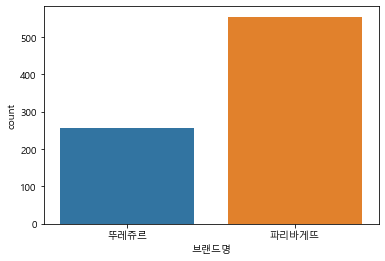

In [75]:
# countplot 으로 브랜드명을 그려봅니다.
sns.countplot(data=df_bread, x="브랜드명")

<AxesSubplot:xlabel='시군구명', ylabel='count'>

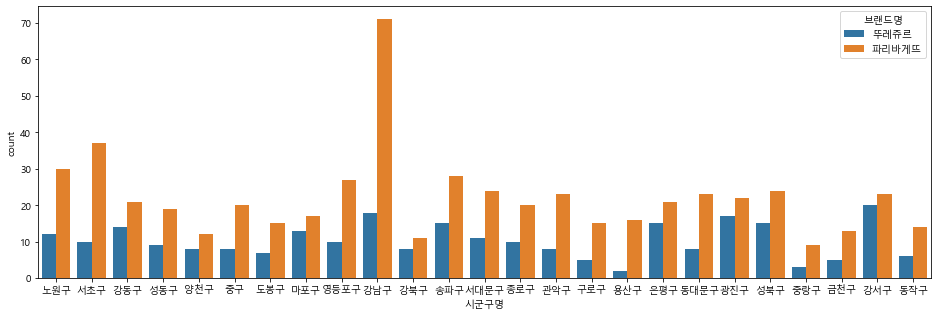

In [80]:
# 시군구별로 브랜드명의 빈도수 차이를 비교합니다.
plt.figure(figsize=(16,5))
sns.countplot(data=df_bread, x="시군구명", hue="브랜드명")

<AxesSubplot:xlabel='경도', ylabel='위도'>

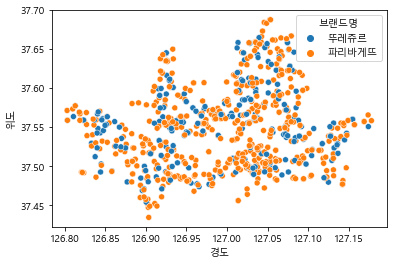

In [82]:
# scatterplot 으로 위경도를 표현해 봅니다.
sns.scatterplot(data=df_bread, x="경도", y="위도", hue="브랜드명")

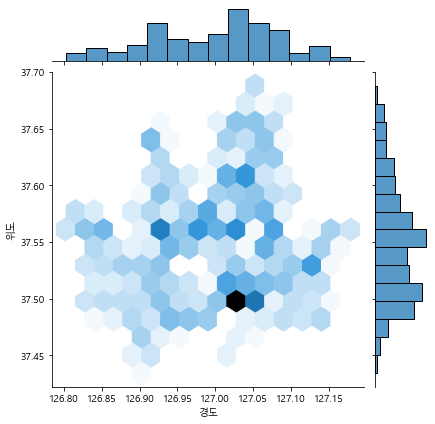

In [86]:
# jointplot 으로 위경도를 표현해 봅니다.
sns.jointplot(data=df_bread, x="경도", y="위도", kind="hex")

## 지도에 표현하기
### Marker 로 위치를 찍어보기

In [88]:
df_bread.index

Int64Index([  2935,  13843,  14031,  14229,  14246,  14713,  14842,  14889,
             14897,  15019,
            ...
            544366, 544527, 551365, 555475, 556168, 559820, 561538, 561810,
            569327, 569479],
           dtype='int64', length=812)

In [91]:
m = folium.Map([lat, long], zoom_start=12, tiles="stamen toner")

for i in df_bread.index:
    sub_lat = df_bread.loc[i, "위도"]
    sub_long = df_bread.loc[i, "경도"]
    
    title = df_bread.loc[i, "상호명"] + " - " + df_bread.loc[i, "도로명주소"]
    
    icon_color = "blue"
    if df_bread.loc[i, "브랜드명"] == "뚜레쥬르":
        icon_color = "green"

    folium.CircleMarker(
        [sub_lat,sub_long ], 
        radius=3,
        color=icon_color,
        popup=f'<i>{title}</i>', 
        tooltip=title).add_to(m)
m

### MarkerCluster 로 표현하기
* https://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/MarkerCluster.ipynb

In [93]:
m = folium.Map([lat, long], zoom_start=12, tiles="stamen toner")

marker_cluster = MarkerCluster().add_to(m)

for i in df_bread.index:
    sub_lat = df_bread.loc[i, "위도"]
    sub_long = df_bread.loc[i, "경도"]
    
    title = df_bread.loc[i, "상호명"] + " - " + df_bread.loc[i, "도로명주소"]
    
    icon_color = "blue"
    if df_bread.loc[i, "브랜드명"] == "뚜레쥬르":
        icon_color = "green"

    folium.CircleMarker(
        [sub_lat,sub_long ], 
        radius=3,
        color=icon_color,
        popup=f'<i>{title}</i>', 
        tooltip=title).add_to(marker_cluster)

m

### Heatmap 으로 그리기
https://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/Heatmap.ipynb

In [94]:
# heatmap 예제 이해하기
data = (
    np.random.normal(size=(100, 3)) *
    np.array([[1, 1, 1]]) +
    np.array([[48, 5, 1]])
).tolist()
data[:5]

[[47.87328733127691, 4.54813530901976, 0.3628599697256636],
 [48.55162172555107, 5.522588598963634, 0.7092084169681185],
 [49.072217054551636, 5.0132930575791255, 2.3141566553111135],
 [48.36605076061059, 5.439443330726687, 0.751093671575375],
 [49.58404946288934, 5.2961308584260705, 0.7007596784454693]]

In [95]:
# heatmap 예제와 같은 형태로 데이터 2차원 배열 만들기
heat = df_bread[["위도", "경도", "브랜드명"]].copy()
heat["브랜드명"] = heat["브랜드명"].str.strip()
heat["브랜드명"] = heat["브랜드명"].replace("뚜레쥬르", 1).replace("파리바게뜨", 1)
heat = heat.values

In [96]:
from folium.plugins import HeatMap

m = folium.Map([lat, long], tiles='stamentoner', zoom_start=12)


for i in df_bread.index:
    sub_lat = df_bread.loc[i, "위도"]
    sub_long = df_bread.loc[i, "경도"]
    
    title = df_bread.loc[i, "상호명"] + " - " + df_bread.loc[i, "도로명주소"]
    
    icon_color = "blue"
    if df_bread.loc[i, "브랜드명"] == "뚜레쥬르":
        icon_color = "green"

    folium.CircleMarker(
        [sub_lat,sub_long ], 
        radius=3,
        color=icon_color,
        popup=f'<i>{title}</i>', 
        tooltip=title).add_to(m)

    
HeatMap(heat).add_to(m)

m